<img src="numpy_logo.png" alt="Drawing" style="width: 200px;"/>

# Numpy. Работа с матрицами. Векторизация.

Модуль numerical python (Numpy http://www.numpy.org) для работы с матрицами. Векторизация вместо циклов. Индексация и срезы в массивах. Чтение и запись файлов с помощью Numpy. 

Полезные клавиши в juputer 

- tab автодополнение
- shift+tab - документация

## Содержание

- [Общая характеристика Numpy](#about)
- [Установка SciPy](#installing)
- [Создание массивов](#arrays)
- [Операции над матрицами, broadcasting](#operations) 
- Векторизация
- Индексация, срезы, выбор по условию 
- Считывание csv файлов в numpy массив, преобразование типов
- Изменение размеров матриц, добавление строк, столбцов
- Пример с линейной регрессией (нормальное уравление)
- Pandas

## Общая характеристика Numpy <a id="about"></a>

NumPy это фундаментальный пакет для научных вычислений с Python. Он содержит большое количество полезных особенностей:

- Мощные N-мерные объект массивов
- Сложные функции
- Инструменты для интеграции с C/C++ и Fortran кодом 
- Полезная линейная алгебра, преобразования Фурье и случайние числа 

Numpy предоставляет функции, которые позволяют оперировать многомернами массивами. 


## Установка <a id="installing"></a>
    
лучше устанавливать полный набор SciPy:
https://www.scipy.org/install.html 

```
pip3 install numpy scipy matplotlib ipython jupyter pandas sympy nose

```

Для windows проще всего взять готовые пакеты:

http://www.lfd.uci.edu/~gohlke/pythonlibs/


## Создание массивов <a id="arrays"></a>

Для создания Numpy массива нужно вызывать метод ```np.array```. Для просмотра документации по методу в jupyter notebook можно нажать ```shift+tab```.

У объектов array есть много методов, подробнее можно посмотреть нажетием клавиши ```tab```. 

Полезным свойством объекта ```array``` является ```shape```, позволяет узнать размерности массива. 

Свойство ```dtype``` позволяет узнать, какой тип данных используется для хранения элементов массив, его можно изменить. 

In [93]:
import numpy as np

a = np.array([1,2,3,4])
print(a.shape)
print(a)
print(a.dtype)
print(type(a))

(4,)
[1 2 3 4]
int64
<class 'numpy.ndarray'>


In [94]:
a = np.array([[1,2,3],[4,5,6]])
print(a)
print(a.shape)
print(a.dtype)
print(type(a))

[[1 2 3]
 [4 5 6]]
(2, 3)
int64
<class 'numpy.ndarray'>


Создание разных видов матриц: единичные, диогональные, нулевые.

In [95]:
E = np.eye(5)
print(E)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [96]:
d = np.diag([1,2,3,4])
print(d)

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [97]:
Z=np.zeros((2,3))
print(Z)

[[ 0.  0.  0.]
 [ 0.  0.  0.]]


## Операции над матрицами. Broadcasting.  <a id="operations"></a>

Особенность numpy в том, что он работает с матрицами как с единой сущностью и проводит всевозможные оптимизации. В Numpy существует набор операций, котрые выполняются над всей матрицей, broadcasting.

In [118]:
# Операции
import numpy as np 

A = np.array([[1,2],[3,4],[5,6]])
B = np.array([[2,2],[2,2],[2,1]])
print(A)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[2 2]
 [2 2]
 [2 1]]


In [119]:
# Сложение, вычитание
print(A+B)
print(B+A)
print(A-B)
print(B-A)

[[3 4]
 [5 6]
 [7 7]]
[[3 4]
 [5 6]
 [7 7]]
[[-1  0]
 [ 1  2]
 [ 3  5]]
[[ 1  0]
 [-1 -2]
 [-3 -5]]


In [120]:
# Транспанирование
print(A)
print(A.T)

[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]


In [122]:
# Поэлементное умножение
print(A)
print("*")
print(B)
print("=")
print(A*B)

[[1 2]
 [3 4]
 [5 6]]
*
[[2 2]
 [2 2]
 [2 1]]
=
[[ 2  4]
 [ 6  8]
 [10  6]]


In [124]:
# Матричное умножение (операция не коммутативная)

# print(A.dot(B))
print(A.dot(B.T))
print(A.T.dot(B))

[[ 6  6  4]
 [14 14 10]
 [22 22 16]]
[[18 13]
 [24 18]]


In [127]:
# Умножение матрицы на число, добавление числа 
print(B)
print(B*2)
print(B + 10)

[[2 2]
 [2 2]
 [2 1]]
[[4 4]
 [4 4]
 [4 2]]
[[12 12]
 [12 12]
 [12 11]]


In [129]:
# Broadcast операции
print(np.sin(B))
print(np.exp(B))

[[ 0.90929743  0.90929743]
 [ 0.90929743  0.90929743]
 [ 0.90929743  0.84147098]]
[[ 7.3890561   7.3890561 ]
 [ 7.3890561   7.3890561 ]
 [ 7.3890561   2.71828183]]


### Инвертирование матриц 

По мат. определению обратная матрица это: $A A^{-1}=E$. Инвертировать можно только квадратную матрицу, с рангом матрицы, равным её размеру, т.е. матрица должна быть не вырожденная. На практике же есть возможность получить псевдо обратную матрицу, в случае, если матрица вырождена.

In [130]:
import numpy as np 
# Операция получения обратной матрицы
from numpy.linalg import inv
# Операция получения псевдо обратной матрицы
from numpy.linalg import pinv

In [131]:
# Для не вырожденных матриц результат обоих функций будет одинаковый. 

A = np.array([[1,2],[3,4]])
A_inv = inv(A)
A_pinv = pinv(A)

print(A)
print(A_inv)
print(A_pinv)

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In [132]:
# Проверим свойства обратной матрицы

print(A.dot(A_inv))
print(A.dot(A_pinv))

[[  1.00000000e+00   0.00000000e+00]
 [  8.88178420e-16   1.00000000e+00]]
[[  1.00000000e+00  -6.66133815e-16]
 [  8.88178420e-16   1.00000000e+00]]


C учётом погрешности вычислений, свойств выполняется $AA^{-1}=E$

Также из свойства $A E = A$ следует что $A A^{-1} A = A$, проверим:

In [133]:
print(A.dot(A_inv).dot(A))
print(A.dot(A_pinv).dot(A))

[[ 1.  2.]
 [ 3.  4.]]
[[ 1.  2.]
 [ 3.  4.]]


Примеры с вырожденной матрицей. Дополнительная информация https://www.quora.com/What-is-the-difference-between-pinv-and-inv 

In [134]:
B = np.array([
    [16, 2, 3, 13],
    [5, 11, 10, 8],
    [9, 7, 6, 12],
    [4, 14, 15, 1]]
)

print(B)
print(np.linalg.matrix_rank(B),"ранг матрицы не равен 4, матрица вырождена")

[[16  2  3 13]
 [ 5 11 10  8]
 [ 9  7  6 12]
 [ 4 14 15  1]]
3 ранг матрицы не равен 4, матрица вырождена


In [135]:
print(inv(B))
print(pinv(B))

[[  9.38249922e+13   2.81474977e+14  -2.81474977e+14  -9.38249922e+13]
 [  2.81474977e+14   8.44424930e+14  -8.44424930e+14  -2.81474977e+14]
 [ -2.81474977e+14  -8.44424930e+14   8.44424930e+14   2.81474977e+14]
 [ -9.38249922e+13  -2.81474977e+14   2.81474977e+14   9.38249922e+13]]
[[ 0.10110294 -0.07389706 -0.06139706  0.06360294]
 [-0.03639706  0.03860294  0.02610294  0.00110294]
 [ 0.01360294 -0.01139706 -0.02389706  0.05110294]
 [-0.04889706  0.07610294  0.08860294 -0.08639706]]


In [136]:
print(B.dot(inv(B)))
print(B.dot(pinv(B)))

[[ 1.        0.        0.        0.      ]
 [-0.75      0.        2.        0.375   ]
 [ 0.25     -0.5       1.        0.25    ]
 [-0.34375  -1.875     2.        1.734375]]
[[ 0.95 -0.15  0.15  0.05]
 [-0.15  0.55  0.45  0.15]
 [ 0.15  0.45  0.55 -0.15]
 [ 0.05  0.15 -0.15  0.95]]


In [137]:
print(B.dot(inv(B)).dot(B))
print(B.dot(pinv(B)).dot(B))

[[ 16.         2.         3.        13.      ]
 [  7.5       17.75      15.375     14.625   ]
 [ 11.5        5.5        5.5       11.5     ]
 [ 10.0625    16.96875   18.234375   6.265625]]
[[ 16.   2.   3.  13.]
 [  5.  11.  10.   8.]
 [  9.   7.   6.  12.]
 [  4.  14.  15.   1.]]


## Векторизация  <a id="vectorization"></a>

Векторизация применяется для быстрых вычислений и для компактности кода. Больше информации в лекции https://www.coursera.org/learn/machine-learning/lecture/WnQWH/vectorization

In [142]:
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

print(a)
print(b)

[ 0.79699632  0.10108015  0.66735003 ...,  0.08399754  0.85176608
  0.16232193]
[ 0.97653807  0.08324867  0.39145981 ...,  0.51632714  0.52343562
  0.49060555]


In [143]:
# С векторизацией 
start = time.time()
c = a.dot(b)
end = time.time()
print( "Результат: ",c, "Время: ", str((end-start)*1000)," ms")

Результат:  249546.516189 Время:  2.3849010467529297  ms


In [144]:
# Без векторизации
start = time.time()
c = 0
for i in range(len(a)):
    c+=a[i]*b[i]
end = time.time()
print( "Результат: ",c, "Время: ", str((end-start)*1000)," ms")

Результат:  249546.516189 Время:  573.4288692474365  ms


In [139]:
#print(a*5-1)
print(a)
print(a.reshape((3,2)))

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


[ 0.02392846  0.22046202  0.00474114  0.86980256  0.03231166  0.12494772
  0.15857799  0.69697277  0.28842934  0.87551416]
[ 0.8233139   0.03836519  0.31412525  0.17541953  0.74563505  0.76223544
  0.83037539  0.89568371  0.37175028  0.42090419]


[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[[22 28]
 [49 64]]


## Индексация, срезы, выбор по условию  <a id="indexation"></a>

## Считывание csv файлов в numpy массив, преобразование типов  <a id="csv"></a>

## Изменение размеров матриц, добавление строк, столбцов <a id="rezise"></a>

## Пример с линейной регрессией (нормальное уравление) <a id="norm"></a>

In [72]:
import numpy as np

a = np.array([10,20,30,40,50,60,70,80,90])
print(a)
print(a[[2,3]])

[10 20 30 40 50 60 70 80 90]
[30 40]


In [74]:
import numpy as np

a = np.array([10,None,30,40,None,60,None,80,90])
print(a)
a[a==None] = 0
print(a)

[10 None 30 40 None 60 None 80 90]
[10 0 30 40 0 60 0 80 90]


In [76]:
a = np.array([1,2,3,-1,-4,-5,3,-5,-6,2])
#a[a<0]=0

print(a[a<0])

[-1 -4 -5 -5 -6]


In [80]:
a = np.array([1,2,3,-1,5000,-5,3000,-5,-6,2])
a[np.logical_or(a<0, a>500)] = 0
print(a)

[1 2 3 0 0 0 0 0 0 2]


In [27]:
import numpy as np
import time
N = 10000000

In [29]:
#a = np.arange(1,10)
a = np.random.rand(N)
b = np.random.rand(N)

print(a.shape)
print(b.shape)

(10000000,)
(10000000,)


$$
\omega = (X^TX+\alpha I)^{-1} X^T y
$$

http://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_(%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80)

https://www.kaggle.com/andonians/random-linear-regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from numpy import genfromtxt
my_data = genfromtxt('test.csv', delimiter=',', skip_header=True)
my_data.shape
print(my_data.dtype)

float64


In [117]:
my_data[:1].shape

(1, 2)

$$
\omega = (X^TX)^{-1}X^Ty
$$

In [87]:
X = my_data[:,0]
X=X.reshape((len(X),1))
X=X.T
y = my_data[:,1]

In [85]:
from numpy.linalg import pinv

X = my_data[:,0]
X=X.reshape((len(X),1))
X=X.T
y = my_data[:,1]
y=y.reshape((len(y),1))

print(X.shape)
print(y.shape)

p = pinv(X.T.dot(X)).dot(X.T)
print(p.shape)
w=p.T.dot(y)

#print(w,y.shape)
#plt.figure(figsize=(16, 8))
#plt.scatter(my_data[:,0], my_data[:,1])
#plt.plot([0,100],[1,50], c="r")
#plt.show()

#%matplotlib inline



(1, 300)
(300, 1)
(300, 1)


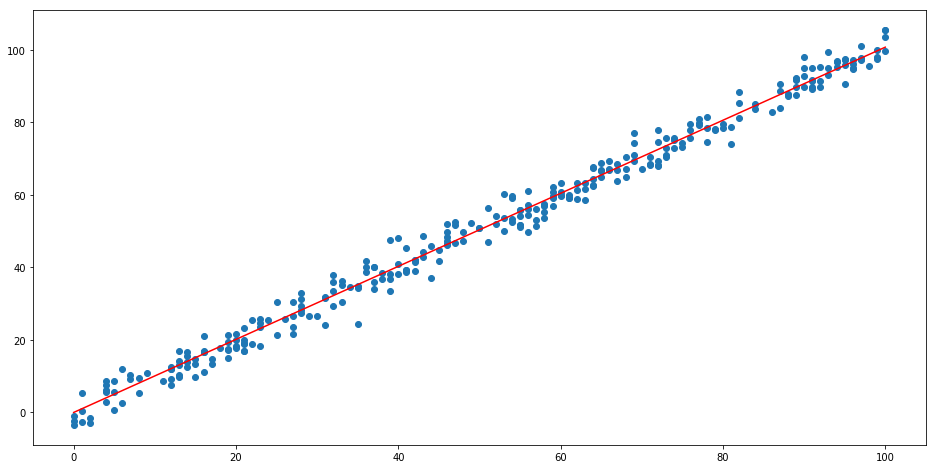

In [88]:
plt.figure(figsize=(16, 8))
plt.scatter(my_data[:,0], my_data[:,1])
plt.plot([0,100],[0*w[0],100*w[0]], c="r")
plt.show()

## Pandas <a id="pandas"></a>